In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# class Sketcher:
#     """OpenCV Utility class for mouse handling."""

#     def __init__(self, windowname, dests, colors_func):
#         self.prev_pt = None
#         self.windowname = windowname
#         self.dests = dests
#         self.colors_func = colors_func
#         self.dirty = False
#         self.show()
#         cv2.setMouseCallback(self.windowname, self.on_mouse)

#     def show(self):
#         cv2.imshow(self.windowname, self.dests[0])
#         cv2.imshow(self.windowname + ": mask", self.dests[1])

#     def on_mouse(self, event, x, y, flags, param):
#         """Hanles mouse movement and events."""
#         pt = (x, y)
#         if event == cv2.EVENT_LBUTTONDOWN:
#             self.prev_pt = pt
#         elif event == cv2.EVENT_LBUTTONUP:
#             self.prev_pt = None

#         if self.prev_pt and flags & cv2.EVENT_FLAG_LBUTTON:
#             for dst, color in zip(self.dests, self.colors_func()):
#                 cv2.line(dst, self.prev_pt, pt, color, 5)
#             self.dirty = True
#             self.prev_pt = pt
#             self.show()

In [3]:
class Sketcher:
    '''OpenCv Utility for Mouse Handling '''
    def __init__(self, windowname, dests, colors_func):
        self.prev_pt = None
        self.windowname = windowname
        self.dests = dests
        self.colors_func = colors_func
        self.dirty = False
        self.show()
        cv2.setMouseCallback(self.windowname,self.on_mouse)

    def show(self):
        cv2.imshow(self.windowname, self.dests[0])
        cv2.imshow(self.windowname + ": mask", self.dests[1])

    def on_mouse(self,event, x, y, flags, param):
        ''' Handles mouse movement and events '''
        pt = (x, y)
        if event == cv2.EVENT_LBUTTONDOWN:
            self.prev_pt = pt
        elif event == cv2.EVENT_LBUTTONUP:
            self.prev_pt = None

        if self.prev_pt and flags & cv2.EVENT_FLAG_LBUTTON:
            for dst, color in zip(self.dests, self.colors_func()):
                cv2.line(dst,self.prev_pt,pt,color,5)
            self.dirty = True
            self.prev_pt = pt
            self.show()     

In [4]:
filename = '../Images/Car.jpg'
img = cv2.imread(filename, cv2.IMREAD_COLOR)

if img is None:
    print("Failed to load image file {}".format(filename))
                

In [5]:
#Creating Mask
img_mask = img.copy()
inpaintMask = np.zeros(img_mask.shape[:2],np.uint8)
sketch = Sketcher('image',[img_mask,inpaintMask],lambda : ((0,255,0),255))

In [6]:
while True:
    ch = cv2.waitKey()
    if ch == 27:
        break
    if ch == ord('t'):
        t1t = time.time()
        res = cv2.inpaint(src = img_mask,inpaintMask = inpaintMask, inpaintRadius = 3, flags = cv2.INPAINT_TELEA)
        t2t = time.time()
        ttime = t2t - t1t
        cv2.imshow('InPaint output using FMM', res)
    if ch == ord('n'):
        t1n = time.time()
        res = cv2.inpaint(src = img_mask,inpaintMask = inpaintMask, inpaintRadius = 3, flags = cv2.INPAINT_NS)
        t2n = time.time()
        ntime = t2n = t1n
        cv2.imshow('InPaint output using NS Technique', res)

    if ch == ord('r'):
        img_mask[:] = img
        inpaintMask[:] = 0
        sketch.show()
        
    

In [7]:
cv2.destroyAllWindows()

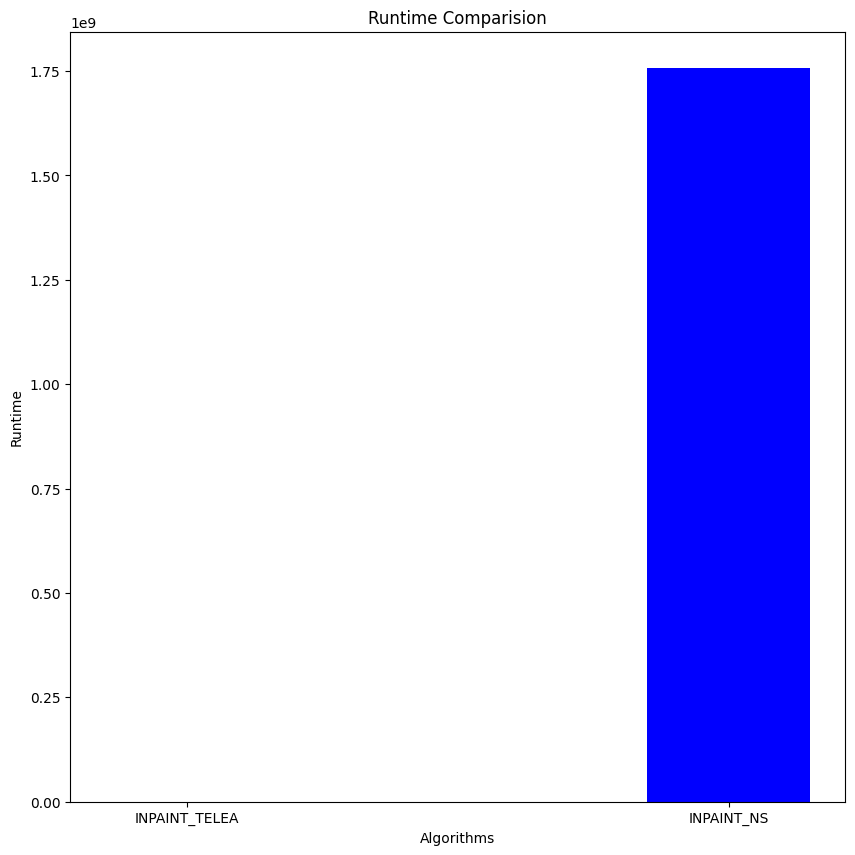

In [8]:
times = [ttime , ntime]
methods = ['INPAINT_TELEA','INPAINT_NS']

fig = plt.figure(figsize = (10,10))

plt.bar(methods,times, color = 'blue', width = 0.3)

plt.xlabel('Algorithms')
plt.ylabel('Runtime')
plt.title('Runtime Comparision')
plt.show()